# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Agusriyati
- **Email:** agusriyati22087@gmail.com
- **ID Dicoding:** agusriyati_4p3m

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana perbandingan rata-rata jumlah pengguna sepeda acak dan pengguna sepeda terdaftar.
- Pertanyaan 2: Bagaimana tren perubahan penggunaan sepeda sepanjang tahun ('yr') di setiap bulan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [2]:
bike_df = pd.read_csv("data\day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
bike2_df = pd.read_csv("data\hour.csv")
bike2_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
# Menghitung jumlah nilai yang hilang dalam dataset
missing_values = bike_df.isnull().sum()
print(missing_values)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [7]:
# Mengecek jumlah entri duplikat dalam dataset
jumlah_duplikat = bike_df.duplicated().sum()
print("Jumlah entri duplikat: ", jumlah_duplikat)

Jumlah entri duplikat:  0


In [8]:
bike2_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
# Menghitung jumlah nilai hilang dalam dataset
jumlah_nilai_hilang = bike2_df.isnull().sum()
print(jumlah_nilai_hilang)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [10]:
# Mengecek jumlah entri duplikat dalam dataset
jumlah_duplikat = bike2_df.duplicated().sum()
print("Jumlah entri duplikat: ", jumlah_duplikat)


Jumlah entri duplikat:  0


### Cleaning Data

In [11]:
# Menghapus salah satu dataset karena value-nya sama diantara dataset yag ada
del bike2_df

In [12]:
# Mengubah tipe data object pada dteday menjadi datetime
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'])

In [13]:
# Memeriksa tipe data setelah perubahan
print(bike_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


## Exploratory Data Analysis (EDA)

### Explore ...

In [14]:
bike_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [15]:
# Menghitung jumlah data untuk setiap bulan yang ada dalam dataset
jumlah_data_per_bulan = bike_df['mnth'].value_counts()
print("Jumlah data per bulan:\n", jumlah_data_per_bulan)

Jumlah data per bulan:
 mnth
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     57
Name: count, dtype: int64


In [20]:
# Menghitung jumlah data untuk setiap tahun yang ada dalam dataset
jumlah_data_per_tahun = bike_df['yr'].value_counts()
print("Jumlah data per tahun:\n", jumlah_data_per_tahun)

Jumlah data per tahun:
 yr
1    366
0    365
Name: count, dtype: int64


In [ ]:
# Mengelompokkan data berdasarkan atribut 'weekday'
bike_df.groupby(by='weekday').agg({
    'cnt': ['max', 'min', 'mean']
})

In [ ]:
# Mengelompokkan data berdasarkan atribut 'holiday'
bike_df.groupby(by='holiday').agg({
    'cnt': ['max', 'min', 'mean']
})

## Visualization & Explanatory Analysis

### Pertanyaan 1:

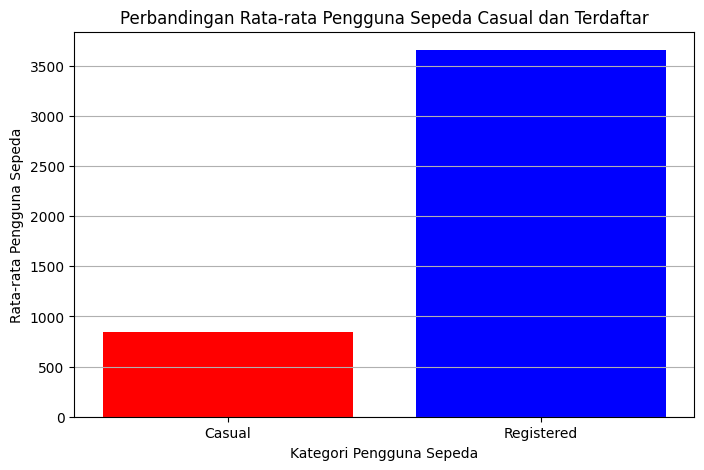

In [17]:
# Menghitung rata-rata pengguna sepeda tidak terdaftar dan terdaftar
avg_casual = bike_df['casual'].mean()
avg_registered = bike_df['registered'].mean()

# Inisialisasi data
user_categories = ["Casual", "Registered"]
average_users = [avg_casual, avg_registered]

# Membuat plot
plt.figure(figsize=(8, 5))
plt.bar(user_categories, average_users, color=["red", "blue"])
plt.xlabel("Kategori Pengguna Sepeda")
plt.ylabel("Rata-rata Pengguna Sepeda")
plt.title("Perbandingan Rata-rata Pengguna Sepeda Casual dan Terdaftar")
plt.grid(axis="y")
plt.show()


In [18]:
# Membandingkan rata-rata pengguna sepeda tidak terdaftar dan terdaftar
avg_casual = bike_df["casual"].mean()
avg_registered = bike_df["registered"].mean()

print("Rata-rata pengguna sepeda tidak terdaftar adalah:", avg_casual)
print("Rata-rata pengguna sepeda terdaftar adalah :", avg_registered)

Rata-rata pengguna sepeda tidak terdaftar adalah: 848.1764705882352
Rata-rata pengguna sepeda terdaftar adalah : 3656.172366621067


### Pertanyaan 2:

<Figure size 1200x600 with 0 Axes>

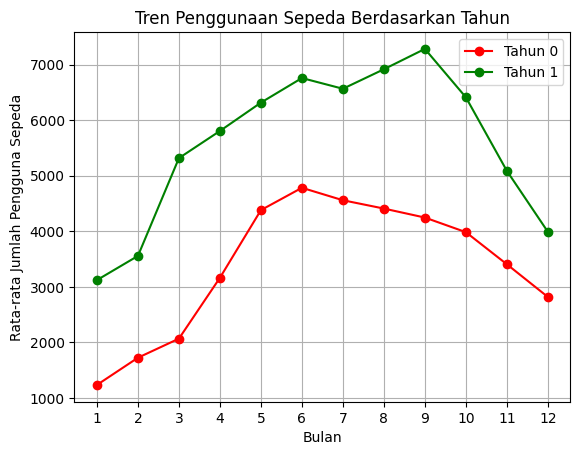

In [19]:
# Mengelompokkan data berdasarkan tahun dan bulan
grouped_data = bike_df.groupby(["yr", "mnth"])["cnt"].mean().unstack()

# Membuat plot
plt.figure(figsize=(12, 6))
grouped_data.T.plot(kind="line", marker="o", color=["red", "green"])
plt.title("Tren Penggunaan Sepeda Berdasarkan Tahun")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Jumlah Pengguna Sepeda")
plt.xticks(range(1, 13))
plt.legend(["Tahun 0", "Tahun 1"])
plt.grid(True)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Perbandingan rata-rata jumlah pengguna sepeda acak dan pengguna sepeda terdaftar dihasilkan bahwa rata-rata pengguna sepeda acak adalah 848.1764705882352 dan rata-rata jumlah pengguna sepeda terdaftar adalah 3656.172366621067. Dapat disimpulkan bahwa nilai rata-rata penggunaan sepeda terdaftar lebih tinggi dari rata-rata penggunaan sepeda secara acak. Maka, pengunjung banyak menggunakan sepeda yang terdaftar daripada menggunakan sepeda secara acak.
- Conclution pertanyaan 2 : Pola perubahan penggunaan sepeda selama tahun ('yr') berdasarkan tiap bulannya adalah pada tahun 0 di bulan 0-6 memilki kenaikan angka penggunaan sepeda, sedangkan pada bulan 7-12 angka penggunaan sepeda menurun. Kemudian pada tahun 1 di bulan 1-6 angka penggunaan sepeda itu meningkat, sedangkan pada bulan 7 memilki penurunan angka penggunaan sepeda, kemudian pada bulan 8-9 memiliki kenaikan angka penggunaan sepeda, dan penurunan angka penggunaan sepeda menurun kembali di bulan 10-12